In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset (1).csv')

In [3]:
# 1. Determine the number of outliers using IQR for every feature
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].count()
    return outliers

outliers = detect_outliers_iqr(df)
print("Number of outliers for each feature:")
print(outliers)

Number of outliers for each feature:
{'age': np.int64(0), 'anaemia': np.int64(0), 'creatinine_phosphokinase': np.int64(29), 'diabetes': np.int64(0), 'ejection_fraction': np.int64(2), 'high_blood_pressure': np.int64(0), 'platelets': np.int64(21), 'serum_creatinine': np.int64(29), 'serum_sodium': np.int64(4), 'sex': np.int64(0), 'smoking': np.int64(0), 'time': np.int64(0), 'DEATH_EVENT': np.int64(0)}


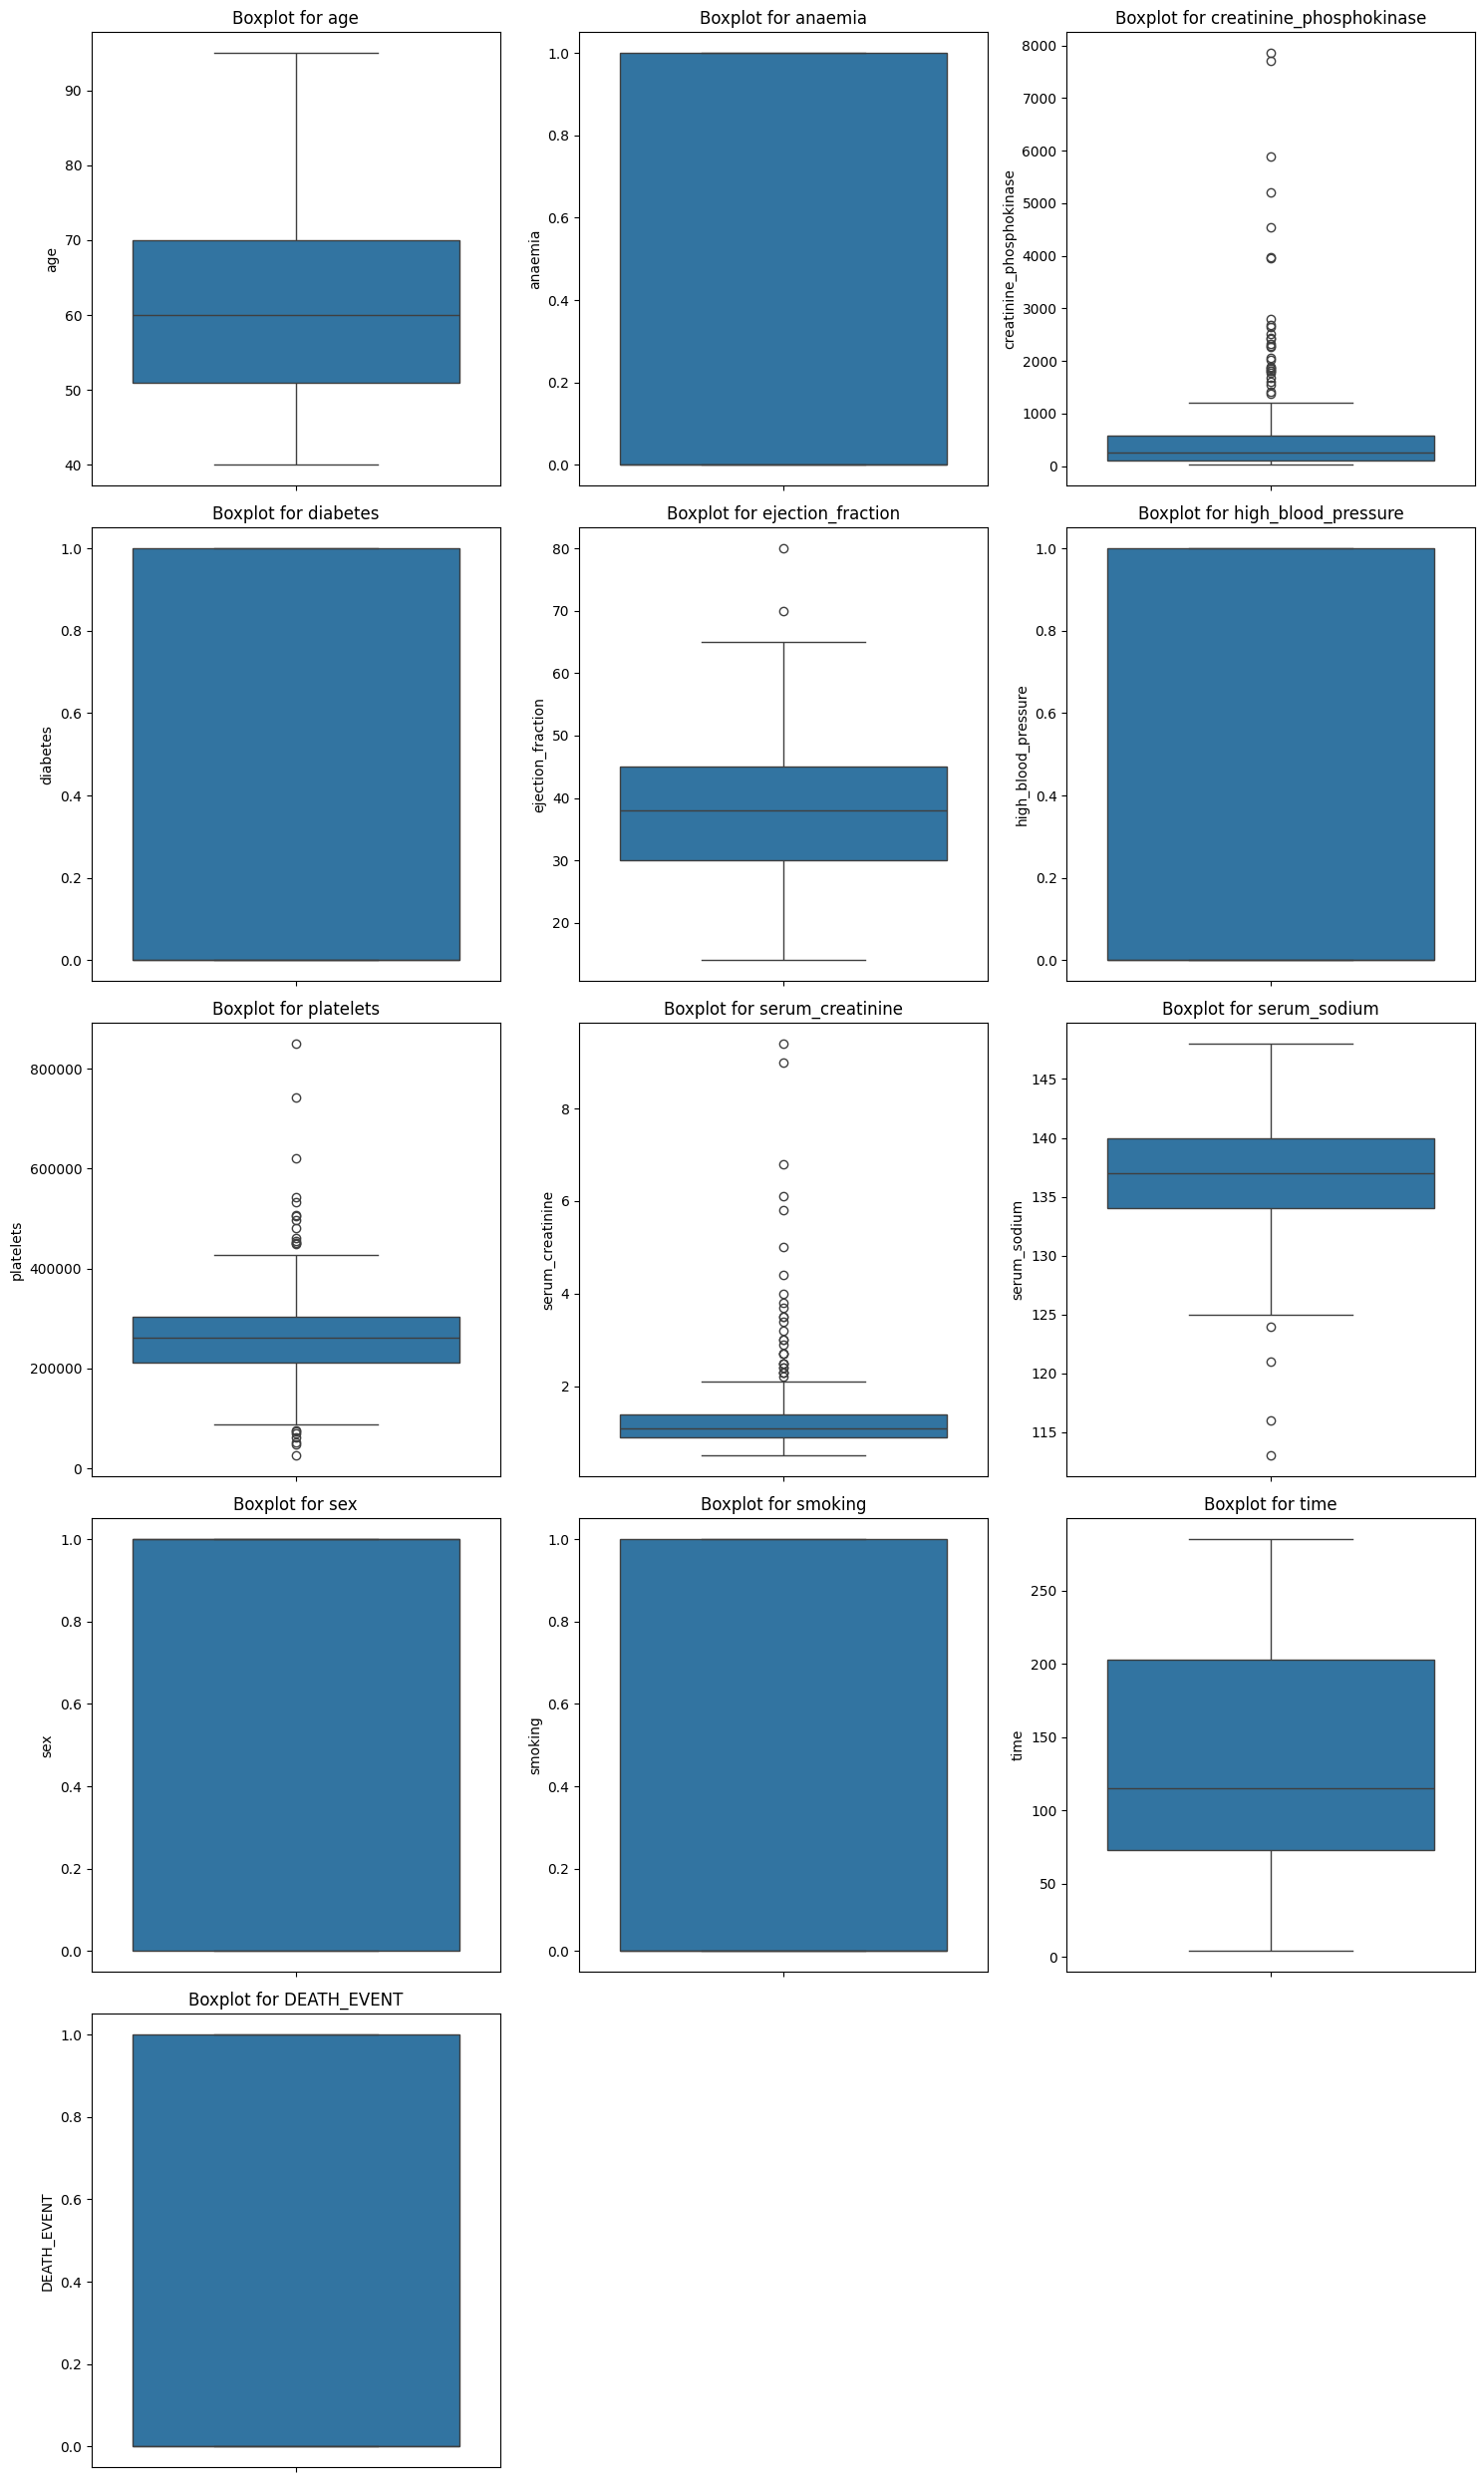

In [4]:
# 2. Draw boxplots for every feature
num_features = df.select_dtypes(include=[np.number]).columns
num_plots = len(num_features)

cols = 3  
rows = (num_plots // cols) + (num_plots % cols > 0)  

plt.figure(figsize=(cols * 5, rows * 5))  
for i, column in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

In [5]:
# 3. Find out the binary variables in the dataset
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
print("Binary Variables:", binary_columns)

for col in binary_columns:
    print(f"{col}: {df[col].unique()}")

Binary Variables: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
anaemia: [0 1]
diabetes: [0 1]
high_blood_pressure: [1 0]
sex: [1 0]
smoking: [0 1]
DEATH_EVENT: [1 0]


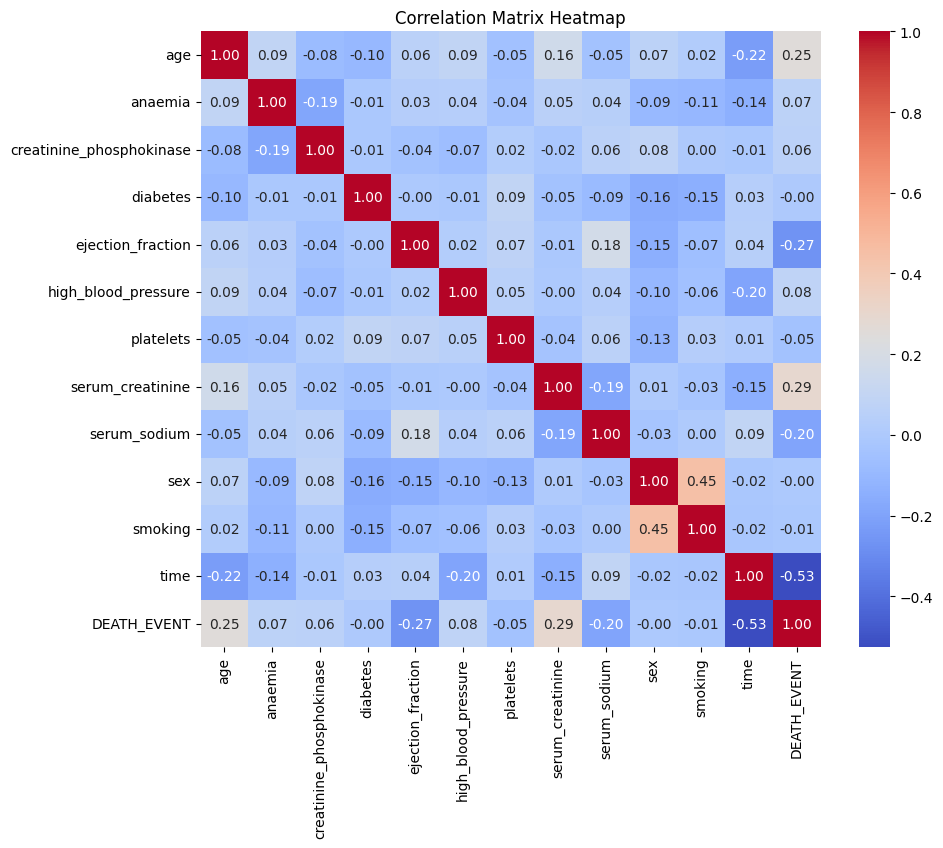

In [6]:
# 4. Draw heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
# 5. Perform resampling on the dataset (if required)

# To check the distribution of the target variable
target = 'DEATH_EVENT'  
print("Target Variable Distribution:")
print(df[target].value_counts())

# To calculate imbalance ratio
minority_class = df[target].value_counts().min()
majority_class = df[target].value_counts().max()
imbalance_ratio = minority_class / majority_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

# To perform oversampling if classes are imbalanced
if imbalance_ratio < 0.5:  # Threshold for imbalance
    print("Classes are imbalanced. Performing oversampling using SMOTE.")
    from imblearn.over_sampling import SMOTE
    X = df.drop(columns=[target])  # Features
    y = df[target]  # Target
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("After Resampling:")
    print(pd.Series(y_resampled).value_counts())
else:
    print("Classes are balanced. Resampling not required.")
    X_resampled = df.drop(columns=[target])  
    y_resampled = df[target]


Target Variable Distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
Imbalance Ratio: 0.47
Classes are imbalanced. Performing oversampling using SMOTE.
After Resampling:
DEATH_EVENT
1    203
0    203
Name: count, dtype: int64


In [8]:
# 6. Train a logistic regression model to predict the target variable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# To split the resampled data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# To train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# To make predictions on the test set
y_pred = model.predict(X_test)

# To evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.83
Precision: 0.86
Recall: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.86      0.78      0.82        41

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82

